In [153]:
import pandas_datareader as pdr
from pandas import Series,DataFrame
import pandas as pd
import datetime
import os

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
google_data = pdr.get_data_tiingo('GOOG', api_key='5ed3326d45f6333e3a43347d9fd2220a1d044ea0')

/var/folders/z1/0yd62ht93l9_sc8csxfkl4ww0000gn/T/ipykernel_36638/2393673279.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  google_data = pdr.get_data_tiingo('GOOG', api_key='5ed3326d45f6333e3a43347d9fd2220a1d044ea0')


In [123]:
g_data_df = google_data.reset_index(['date'])

In [133]:
g_data_df['date'] = g_data_df['date'].dt.date

In [142]:
g_data_df = g_data_df.set_index('date')

In [161]:
g_data_df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,MV avg for 10 days,MV avg for 20 days,MV avg for 50 days
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.0,1257.000000,1248.000000,1238.000000,1208.000000
mean,1577.477737,1593.867894,1560.447728,1576.720467,2.698367e+06,84.239460,85.131598,83.322167,84.201060,3.085473e+07,0.0,1.015115,84.312147,84.385690,84.530244
std,714.181074,721.696325,707.011701,714.721974,5.242769e+06,31.910799,32.260347,31.589115,31.945251,1.349928e+07,0.0,0.535903,31.881127,31.869385,31.800213
min,96.150000,99.300000,95.270000,95.930000,3.467530e+05,48.422500,48.611500,48.026005,48.418500,6.935060e+06,0.0,1.000000,49.680250,50.562950,51.423960
25%,1115.520000,1127.280000,1103.620000,1116.000000,1.158377e+06,57.310500,57.717500,56.623050,57.192500,2.240076e+07,0.0,1.000000,57.199925,57.226469,57.641278
50%,1308.860000,1315.000000,1297.410000,1305.280000,1.434042e+06,70.836500,71.848500,70.100000,70.862500,2.749540e+07,0.0,1.000000,71.399200,71.065981,69.777328
75%,2187.450000,2237.310000,2142.100000,2166.740000,1.888467e+06,113.363500,114.810000,112.142000,113.303500,3.512044e+07,0.0,1.000000,113.504500,113.352394,113.780635
max,3014.180000,3042.000000,2997.750000,3037.270000,6.454012e+07,150.709000,152.100000,149.887500,151.863500,1.241405e+08,0.0,20.000000,148.980700,147.955525,146.183850


In [110]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1257 entries, ('GOOG', Timestamp('2017-10-19 00:00:00+0000', tz='UTC')) to ('GOOG', Timestamp('2022-10-17 00:00:00+0000', tz='UTC'))
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        1257 non-null   float64
 1   high         1257 non-null   float64
 2   low          1257 non-null   float64
 3   open         1257 non-null   float64
 4   volume       1257 non-null   int64  
 5   adjClose     1257 non-null   float64
 6   adjHigh      1257 non-null   float64
 7   adjLow       1257 non-null   float64
 8   adjOpen      1257 non-null   float64
 9   adjVolume    1257 non-null   int64  
 10  divCash      1257 non-null   float64
 11  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 196.1+ KB


<AxesSubplot: xlabel='date'>

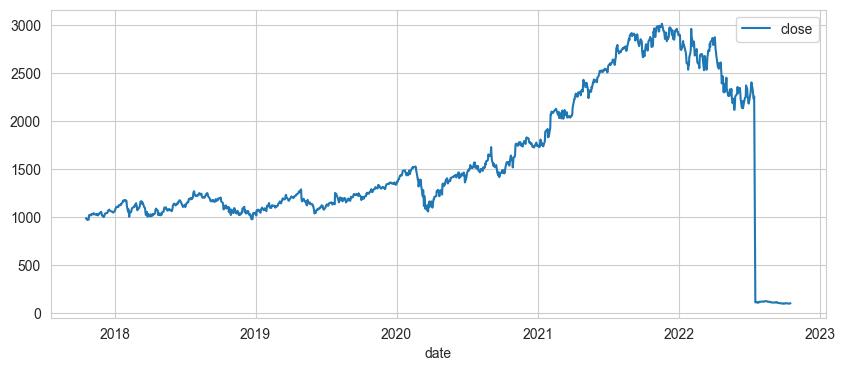

In [147]:
g_data_df['close'].plot(legend=True,figsize=(10,4))

<AxesSubplot: xlabel='date'>

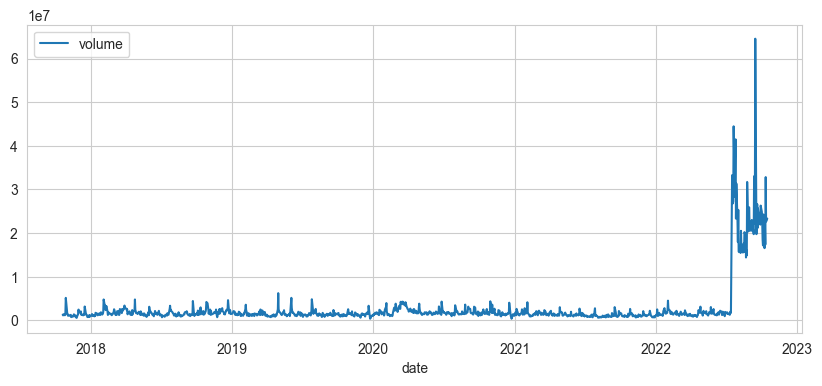

In [148]:
g_data_df['volume'].plot(legend=True,figsize=(10,4))

In [157]:
#Moving average of 10, 20 , 50 days
mv_avg = [10, 20, 50]
for mv in mv_avg:
    col_name = "MV avg for %s days"%(str(mv))
    g_data_df[col_name] = pd.Series(g_data_df['adjClose']).rolling(window=mv).mean()

In [158]:
g_data_df

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,MV avg for 10 days,MV avg for 20 days,MV avg for 50 days
date,,,,,,,,,,,,,,,
2017-10-19,984.45,988.8800,978.3900,986.000,1282755,49.2225,49.4440,48.919500,49.3000,25655100,0.0,1.0,NaN,NaN,NaN
2017-10-20,988.20,991.0000,984.5800,989.440,1120038,49.4100,49.5500,49.229000,49.4720,22400760,0.0,1.0,NaN,NaN,NaN
2017-10-23,968.45,989.5200,966.1200,989.520,1431886,48.4225,49.4760,48.306000,49.4760,28637720,0.0,1.0,NaN,NaN,NaN
2017-10-24,970.54,972.2300,961.0000,970.000,1155231,48.5270,48.6115,48.050000,48.5000,23104620,0.0,1.0,NaN,NaN,NaN
2017-10-25,973.33,976.0900,960.5201,968.370,1162606,48.6665,48.8045,48.026005,48.4185,23252120,0.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-11,98.05,100.1200,97.2500,98.250,21617727,98.0500,100.1200,97.250000,98.2500,21617727,0.0,1.0,99.748,100.6605,109.3388
2022-10-12,98.30,99.6476,97.6700,98.270,17343431,98.3000,99.6476,97.670000,98.2700,17343431,0.0,1.0,99.504,100.2820,108.9868
2022-10-13,99.71,100.5300,95.2700,95.930,32812220,99.7100,100.5300,95.270000,95.9300,32812220,0.0,1.0,99.666,100.0725,108.6054


<AxesSubplot: xlabel='date'>

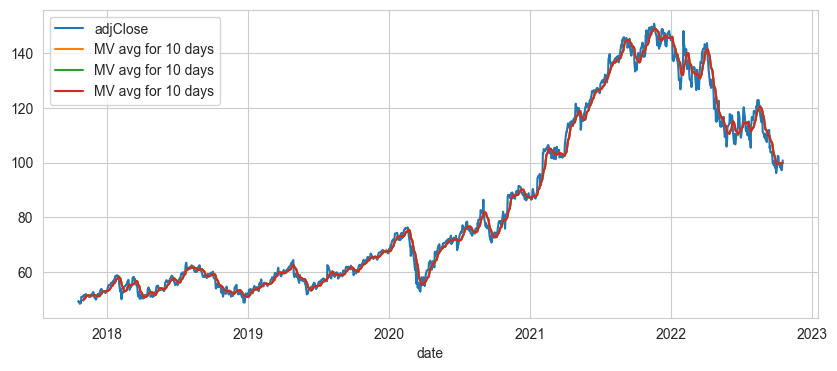

In [160]:
g_data_df[['adjClose','MV avg for 10 days','MV avg for 10 days','MV avg for 10 days']].plot(subplots=False,figsize=(10,4))